In [74]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [94]:
def poly(x):
    return [x**i for i in range(6)]

def fit_ridge_regression(X, Y, l):
#     print(np.linalg.inv(l * np.eye(X.shape[1]) + X.T.dot(X)).dot(X.T).dot(Y))
    return np.linalg.inv(l * np.eye(X.shape[1]) + X.T.dot(X)).dot(X.T).dot(Y)

In [95]:
# data for training 500 models
x = np.linspace(0, 2*3, 15)
data = np.array([np.sin(x) + np.random.normal(0, 0.3, len(x)) for i in range(500)])

# data for testing models
test_x = np.linspace(0, 2*3, 1000)
test_y = np.sin(test_x) + np.random.normal(0, 0.3, len(test_x))

# making polynomial features
X = np.array([poly(point) for point in x])
X_test = np.array([poly(point) for point in test_x])

In [96]:
ls = np.exp(np.linspace(-3, 2, 50))
bs = [] # mean bias**2 for l
vs = [] # mean variance for l
err = [] # mean error for l

for l in ls:
    Y = [X_test.dot(fit_ridge_regression(X, data[i], l)) for i in range(500)]
    err.append(np.mean((Y - test_y)**2))
    Y_mean = np.mean(Y, axis=0)
    bs.append(np.mean((Y_mean - np.sin(test_x))**2))
    vs.append(np.mean((Y - Y_mean)**2))

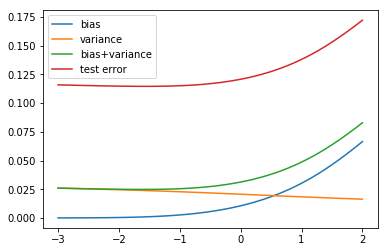

In [97]:
plt.plot(np.log(ls), bs, label="bias")
plt.plot(np.log(ls), vs, label="variance")
plt.plot(np.log(ls), np.array(vs) + np.array(bs), label="bias+variance")
plt.plot(np.log(ls), err, label="test error")
plt.legend();